<a href="https://colab.research.google.com/github/raviteja-padala/Time_Series/blob/main/Forecasting_on_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting on Sales Data

### Title:
Sales Data Time Series Forecasting

### Objective:
To forecast sales data for a single item using various time series forecasting methods.

## Summary:
This project aimed to forecast sales data for a single item from the Kaggle Store Item Demand Forecasting Challenge dataset. The objective was to understand the sales patterns and choose the most accurate forecasting model.

Datasource: https://www.kaggle.com/competitions/demand-forecasting-kernels-only/data

### Key Steps:
1. Data Source: The dataset was obtained from Kaggle, specifically the Store Item Demand Forecasting Challenge.

2. Data Preprocessing: Preprocessing steps were performed to clean the data, including removing outliers that could affect the accuracy of forecasts.

3. Sales Analysis: The sales data was analyzed on a daily, monthly, and yearly basis to identify patterns and trends.

4. Time Series Decomposition: The time series data was decomposed both additively and multiplicatively to examine its components, such as trend and seasonality.

5. Forecasting Models: Various time series forecasting models were applied to the data, including Naive Forecast, Simple Average, Simple Moving Average, Simple Exponential Smoothing, Holt's Winters Exponential Smoothing (both additive and multiplicative methods), ARIMA, and SARIMA.

6. Model Evaluation: Each forecasting model was evaluated based on Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).



## Importing required libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [ ]:
#Loading sales data set
sales_df = pd.read_csv("https://raw.githubusercontent.com/raviteja-padala/Datasets/main/product-sales-forecasting.csv")

sales_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
#viewing df
sales_df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [ ]:
#shape of dataset
sales_df.shape

(913000, 4)

In [ ]:
#info
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


## Cheking Null values

In [ ]:
#checking null values
sales_df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
#making a copy of dataset for further analysis
df = sales_df.copy()

## Preprocessing Dataset

In [ ]:
# Filter records for store 1 and item 1 -> to be able to scale to other items in the future
df = df[df['store'] == 1]
df = df[df['item'] == 1]

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d') # convert date column to datatime object

# Create Date-related Features to be used for EDA and Supervised ML: Regression
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)

In [ ]:
# viewing modified dataframe
df

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5
...,...,...,...,...,...,...,...,...
1821,2017-12-27,1,1,14,2017,12,27,2
1822,2017-12-28,1,1,19,2017,12,28,3
1823,2017-12-29,1,1,15,2017,12,29,4
1824,2017-12-30,1,1,27,2017,12,30,5


In [ ]:
#checking datatypes
df.dtypes

date       datetime64[ns]
store               int64
item                int64
sales               int64
year                int64
month               int64
day                 int64
weekday             int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1826 non-null   datetime64[ns]
 1   store    1826 non-null   int64         
 2   item     1826 non-null   int64         
 3   sales    1826 non-null   int64         
 4   year     1826 non-null   int64         
 5   month    1826 non-null   int64         
 6   day      1826 non-null   int64         
 7   weekday  1826 non-null   int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 128.4 KB


In [ ]:
# we need to set Month  as index column.

df1 = df.set_index('date',inplace=False)
df1.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13,2013,1,1,1
2013-01-02,1,1,11,2013,1,2,2
2013-01-03,1,1,14,2013,1,3,3
2013-01-04,1,1,13,2013,1,4,4
2013-01-05,1,1,10,2013,1,5,5


In [ ]:
print(df1)

            store  item  sales  year  month  day  weekday
date                                                     
2013-01-01      1     1     13  2013      1    1        1
2013-01-02      1     1     11  2013      1    2        2
2013-01-03      1     1     14  2013      1    3        3
2013-01-04      1     1     13  2013      1    4        4
2013-01-05      1     1     10  2013      1    5        5
...           ...   ...    ...   ...    ...  ...      ...
2017-12-27      1     1     14  2017     12   27        2
2017-12-28      1     1     19  2017     12   28        3
2017-12-29      1     1     15  2017     12   29        4
2017-12-30      1     1     27  2017     12   30        5
2017-12-31      1     1     23  2017     12   31        6

[1826 rows x 7 columns]


## Descriptive statistics of Sales data

In [ ]:
df1['sales'].describe()

count    1826.000000
mean       19.971522
std         6.741022
min         4.000000
25%        15.000000
50%        19.000000
75%        24.000000
max        50.000000
Name: sales, dtype: float64

## Handling Outliers

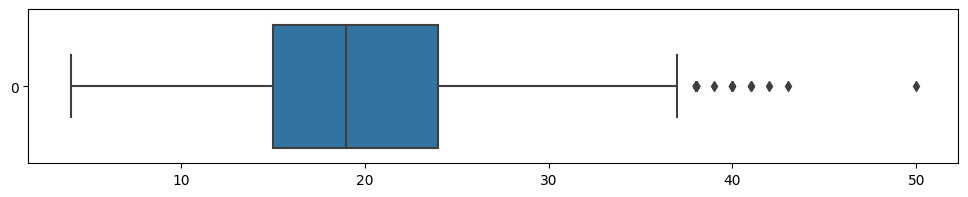

In [ ]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df1['sales'], orient='h', whis=1.5)

In [ ]:
# calculate IQR
q1 = np.percentile(df1['sales'], 25)
q3 = np.percentile(df1['sales'], 75)
iqr = q3 - q1

# define the outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# identify outliers
outliers = df1['sales'].loc[(df1['sales'] < lower_bound) | (df1['sales'] > upper_bound)]

print(outliers)

date
2013-06-09    38
2015-06-06    43
2015-07-04    40
2015-07-16    41
2015-07-18    38
2015-07-19    38
2015-07-26    38
2015-09-19    40
2016-05-15    39
2016-06-03    38
2016-07-01    42
2016-07-30    38
2017-06-10    41
2017-06-18    38
2017-06-28    50
2017-07-02    38
2017-07-14    38
2017-07-15    40
2017-08-26    38
2017-09-01    38
Name: sales, dtype: int64


In [ ]:
# trim outliers
# The .loc[] method is used to select rows or columns based on a ~boolean expression.
# In this case, the boolean expression is ~df1['sales'].isin(outliers), which returns True for rows where the value in the sales column is not an outlier and False for rows where the value is an outlier.

df1 = df1.loc[~df1['sales'].isin(outliers)]

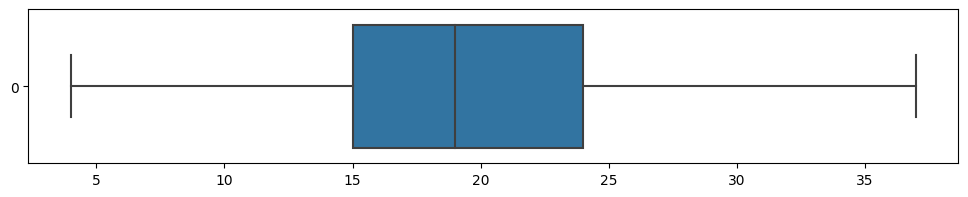

In [ ]:
# plotting box plot after handling outliers
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(df1['sales'], orient='h', whis=1.5)

## Day wise sales

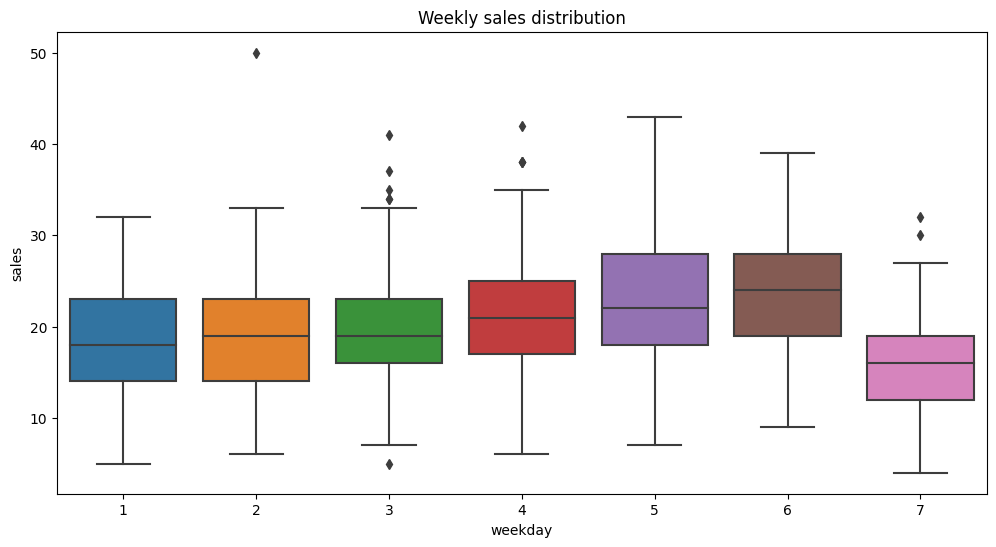

In [ ]:
plot = sns.boxplot(x='weekday', y='sales', data=df)
_ = plot.set(title='Weekly sales distribution')

*Observation*: Inference: The average number of sales increases over the week, is maximum on Saturday (6), and takes a sharp fall on Sunday (7)

## Month wise sales

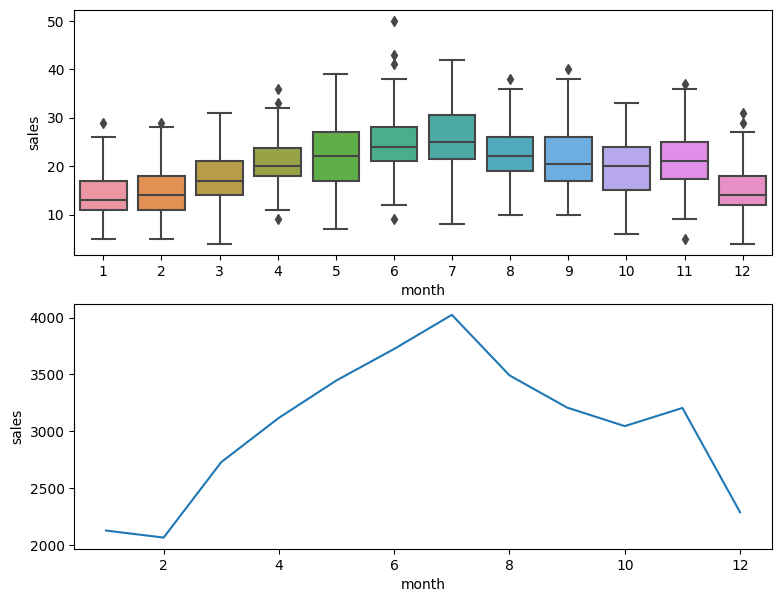

In [ ]:
monthly_agg = df.groupby('month')['sales'].sum().reset_index()
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
sns.boxplot(x='month', y='sales', data=df, ax=axs[0])
_ = sns.lineplot(x='month', y='sales', data=monthly_agg, ax=axs[1])

*Observation*:  The number of sales gradually ascends in the first half of the year starting February (2), peaks in July (7), and then gradually descends, before slightly increasing in November (11) and then dropping again in December (12).

## Year wise sales

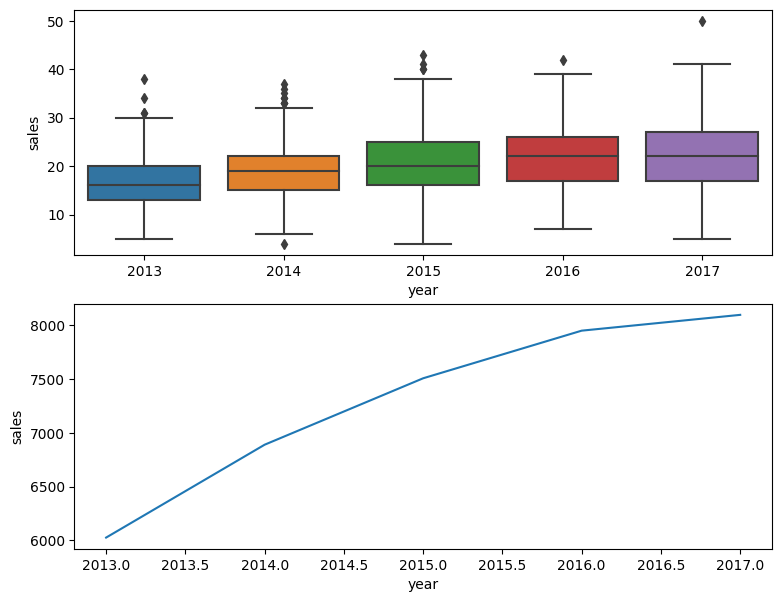

In [ ]:
yearly_agg = df.groupby('year')['sales'].sum().reset_index()
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
sns.boxplot(x='year', y='sales', data=df, ax=axs[0])
_ = sns.lineplot(x='year', y='sales', data=yearly_agg, ax=axs[1])

*Observation:*  From the number of sales vs. year plot, we can infer an increasing trend over the years. The aggregate number of sales has increased from approximately 6000 in 2013 to slightly over 8000 in 2017, i.e. a 33.3% increase in the number of sales approximately. A clear trend is captured by the lineplot above.


# Additive and multiplicative Decompostion of Time series data

* **Additive model:** The additive model assumes that the seasonal component is added to the trend component. This means that the seasonal pattern is the same regardless of the level of the trend. For example, if the trend is increasing, the seasonal pattern will also increase.
* **Multiplicative model:** The multiplicative model assumes that the seasonal component is multiplied by the trend component. This means that the seasonal pattern is proportional to the level of the trend. For example, if the trend is increasing, the seasonal pattern will also increase, but at a faster rate.

The choice of whether to use the additive or multiplicative model depends on the data. In general, the additive model is a good choice if the seasonal pattern is relatively constant, while the multiplicative model is a good choice if the seasonal pattern is proportional to the level of the trend.

### SimpleDescription
**Additive	: The seasonal component is added to the trend component.**

**Multiplicative :	The seasonal component is multiplied by the trend component.**

The `seasonal_decompose()` function in Python's statsmodels library is used to decompose a time series into its trend, seasonal, and residual components.
- The trend component represents the long-term movement of the series,
- the seasonal component represents the periodic fluctuations in the series, and
- the residual component represents the random fluctuations in the series.

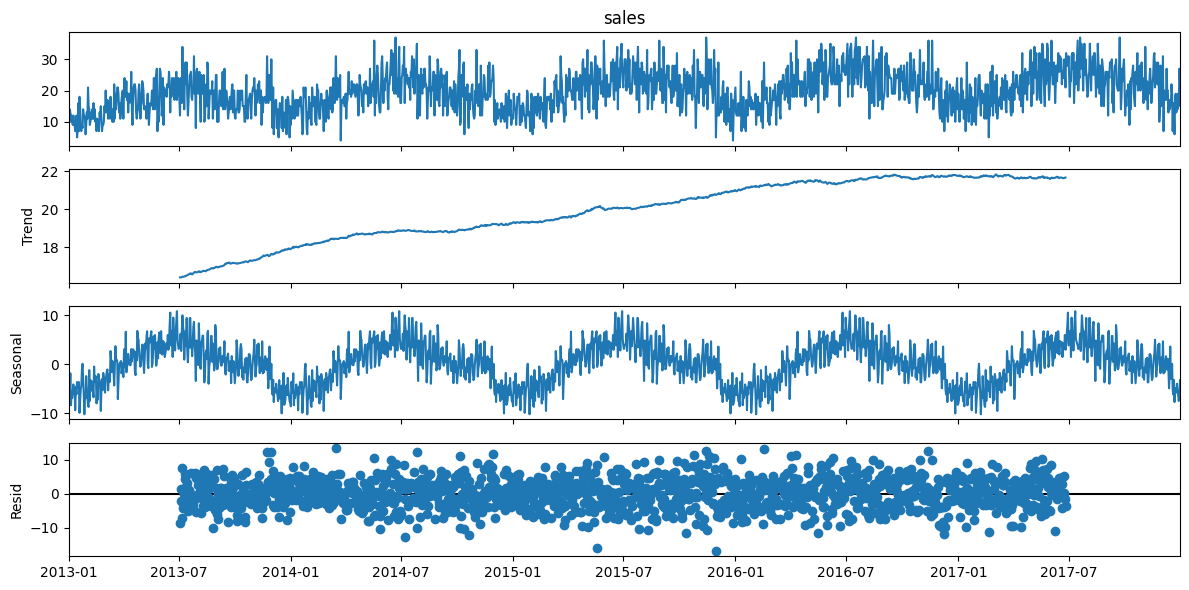

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df1 is your DataFrame
sales_column = df1['sales']

# Perform seasonal decomposition with a period of 365 days (yearly seasonality)
decomposition = seasonal_decompose(sales_column, model='additive', period=365)

# Plot the decomposition components
decomposition.plot()

plt.show()


*Observation*:

 The trend component shows an overall increasing trend, with some fluctuations. The seasonal component shows a clear yearly pattern, with higher sales in the summer months and lower sales in the winter months. The residual component shows the random fluctuations that are not explained by the trend or seasonal components.

The seasonal decomposition can be used to understand the different components of a time series and to identify any patterns or trends. In this case, the seasonal decomposition shows that the sales data has a clear yearly pattern, with higher sales in the summer months and lower sales in the winter months. This information could be useful for businesses that want to plan their marketing and sales campaigns.

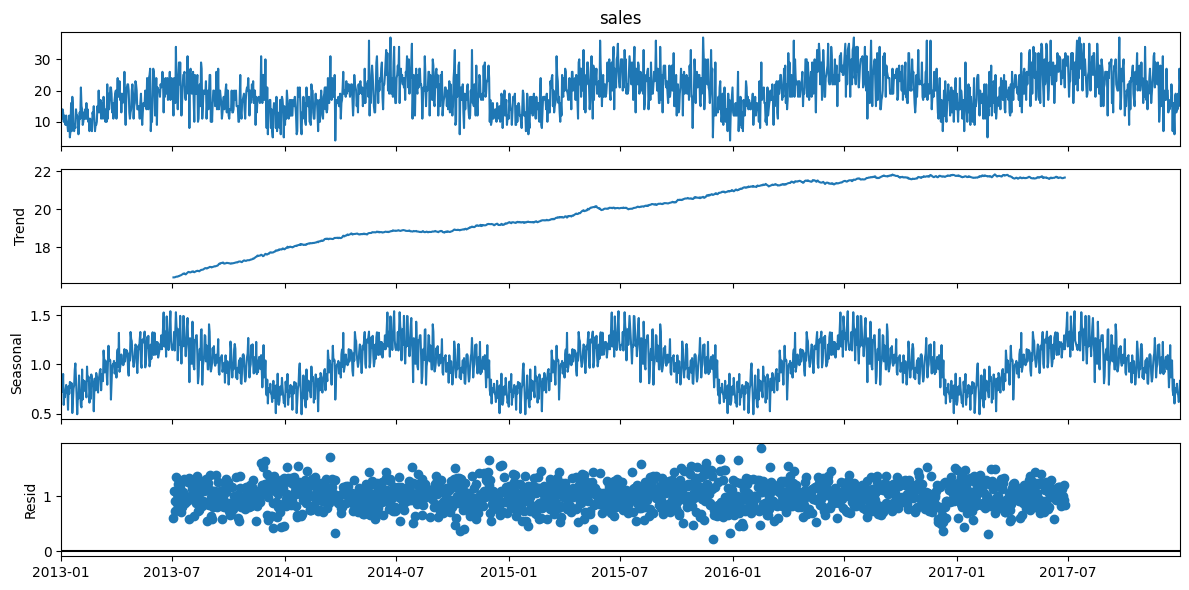

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

sales_column = df1['sales']

# Perform seasonal decomposition with a period of 365 days (yearly seasonality)
decomposition = seasonal_decompose(sales_column, model='multiplicative', period=365)

# Plot the decomposition components
decomposition.plot()

plt.show()


The trend range is the difference between the highest and lowest values of the trend component. In the additive model, the trend range is from 10 to 22, which means that the trend component has a value between 10 and 22 for all data points.

The seasonal range is the difference between the highest and lowest values of the seasonal component. In the additive model, the seasonal range is from -10 to 10, which means that the seasonal component can have a value between -10 and 10 for different data points.

The residual range is the difference between the highest and lowest values of the residual component. In the additive model, the residual range is from -15 to 15, which means that the residual component can have a value between -15 and 15 for different data points.

The same interpretation applies to the multiplicative model, with the only difference being that the seasonal component is multiplied by the trend component instead of being added to it.

In general, a larger trend range indicates a stronger trend, while a larger seasonal range indicates a stronger seasonal pattern. A larger residual range indicates more random fluctuations in the data.

In the case , the trend range is the same in both the additive and multiplicative models. This means that the strength of the trend is the same in both models. However, the seasonal range is larger in the multiplicative model than in the additive model. This means that the seasonal pattern is stronger in the multiplicative model.

The residual range is also larger in the multiplicative model than in the additive model. This means that there are more random fluctuations in the data in the multiplicative model.

Overall, the multiplicative model is a better fit for the data than the additive model because it captures the stronger seasonal pattern and the more random fluctuations in the data.

## Naive model

A Naive time series forecast, also known as a Naive forecast or Naive method, is one of the simplest methods used in time series forecasting. It assumes that future values in a time series will be the same as the most recent observed value. In other words, it assumes that there is no underlying pattern or trend in the data, and the forecast for the next period is just a repetition of the last observed value.
.

The Naive method is straightforward to implement and can serve as a baseline model for comparison with more advanced forecasting techniques. However, it is only suitable for time series data that exhibit a high degree of persistence or when there is no significant trend or seasonality present. It is not effective for capturing complex patterns or trends in the data.

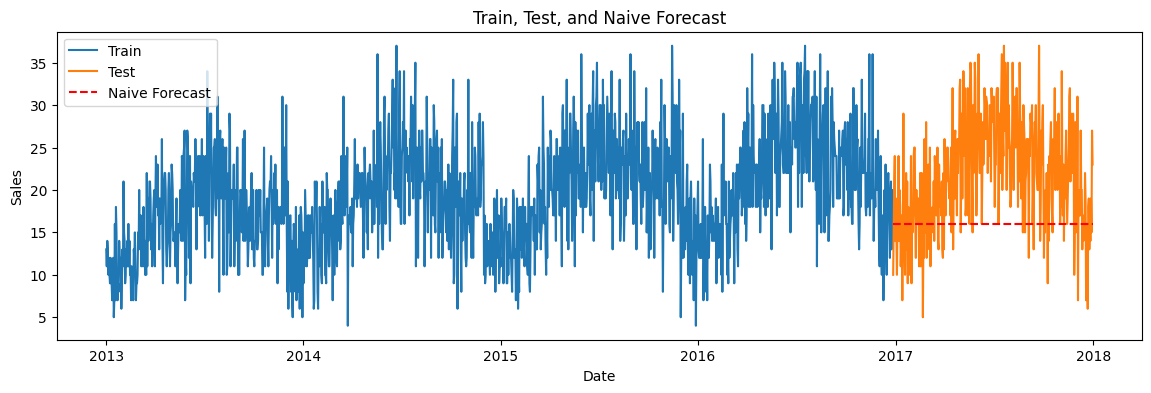

Mean Absolute Error (MAE): 6.96
Mean Squared Error (MSE): 74.33
Root Mean Squared Error (RMSE): 8.62
Mean Absolute Percentage Error (MAPE): 30.33%
            Model       MAE        MSE      RMSE       MAPE
0  Naive Forecast  6.958564  74.328729  8.621411  30.333006


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df1 is your DataFrame
# Let's say you want to split it into 80% train and 20% test
train_size = int(len(df1) * 0.8)
train_df = df1.iloc[:train_size]
test_df = df1.iloc[train_size:]

# Create a naive forecast model
def naive_forecast(train_data, test_data):
    # Get the last value from the training data
    last_value = train_data.iloc[-1]['sales']

    # Create a forecast array with the same length as the test data
    forecast = np.full(len(test_data), last_value)

    return forecast

# Make a naive forecast
naive_sales_forecast = naive_forecast(train_df, test_df)

# Plot the train, test, and forecast data
plt.figure(figsize=(14, 4))
plt.plot(train_df.index, train_df['sales'], label='Train')
plt.plot(test_df.index, test_df['sales'], label='Test')
plt.plot(test_df.index, naive_sales_forecast, label='Naive Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Train, Test, and Naive Forecast')
plt.legend()
plt.show()

# Evaluate the naive model
mae = mean_absolute_error(test_df['sales'], naive_sales_forecast)
mse = mean_squared_error(test_df['sales'], naive_sales_forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_df['sales'] - naive_sales_forecast) / test_df['sales'])) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Create a metrics DataFrame if it doesn't exist
metrics = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE'])

# Append the metrics for the naive forecast model
metrics = metrics.append({'Model': 'Naive Forecast',
                          'MAE': mae,
                          'MSE': mse,
                          'RMSE': rmse,
                          'MAPE': mape}, ignore_index=True)

# Print the metrics
print(metrics)

# Simple Average Forecast

A Simple Average Forecast, also known as a Simple Mean Forecast, is a basic time series forecasting method used to predict future values in a time series by averaging the historical data points. It assumes that future values will be similar to the historical average of the observed data.

In simpler terms, the Simple Average Forecast simply adds up all the historical data points and divides them by the number of data points to calculate the average. This average value is then used as the forecast for the next period.

The Simple Average Forecast is easy to implement and is often used as a basic benchmark or reference point for evaluating more advanced forecasting methods. However, it has limitations and may not perform well when dealing with time series data that exhibit trends, seasonality, or other complex patterns, as it assumes that future values will be constant and equal to the historical average.

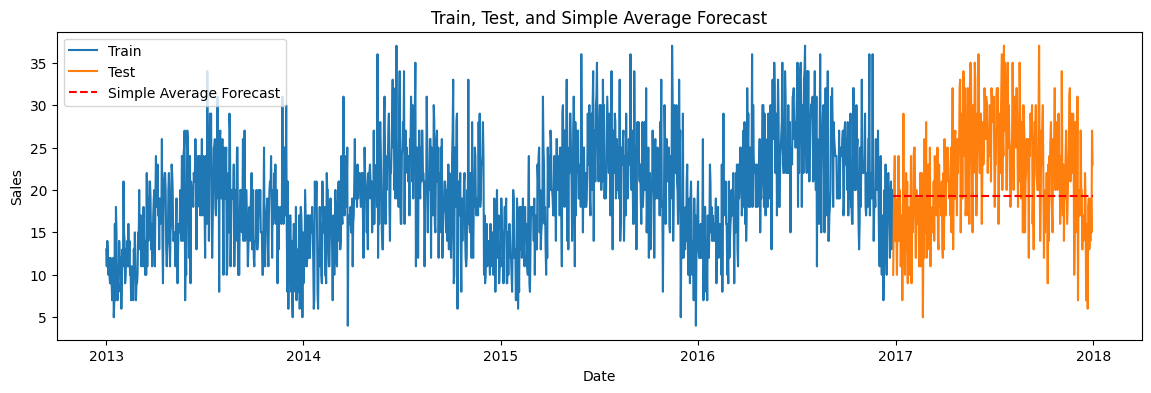

Mean Absolute Error (MAE): 5.62
Mean Squared Error (MSE): 47.69
Root Mean Squared Error (RMSE): 6.91
Mean Absolute Percentage Error (MAPE): 27.97%
                     Model       MAE        MSE      RMSE       MAPE
0           Naive Forecast  6.958564  74.328729  8.621411  30.333006
1  Simple_Average_forecast  5.620296  47.686163  6.905517  27.970364


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df1 is your DataFrame
# Let's say you want to split it into 80% train and 20% test
train_size = int(len(df1) * 0.8)
train_df = df1.iloc[:train_size]
test_df = df1.iloc[train_size:]

# Create a simple average forecast model
def simple_average_forecast(train_data, test_data):
    # Calculate the mean of sales in the training data
    average_sales = train_data['sales'].mean()

    # Create a forecast array with the same length as the test data
    forecast = np.full(len(test_data), average_sales)

    return forecast

# Make a simple average forecast
simple_average_sales_forecast = simple_average_forecast(train_df, test_df)

# Plot the train, test, and forecast data
plt.figure(figsize=(14, 4))
plt.plot(train_df.index, train_df['sales'], label='Train')
plt.plot(test_df.index, test_df['sales'], label='Test')
plt.plot(test_df.index, simple_average_sales_forecast, label='Simple Average Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Train, Test, and Simple Average Forecast')
plt.legend()
plt.show()

# Evaluate the simple average model
mae = mean_absolute_error(test_df['sales'], simple_average_sales_forecast)
mse = mean_squared_error(test_df['sales'], simple_average_sales_forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_df['sales'] - simple_average_sales_forecast) / test_df['sales'])) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Create a metrics DataFrame if it doesn't exist
#metrics = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE'])

# Append the metrics for the naive forecast model
metrics = metrics.append({'Model': 'Simple_Average_forecast',
                          'MAE': mae,
                          'MSE': mse,
                          'RMSE': rmse,
                          'MAPE': mape}, ignore_index=True)

# Print the metrics
print(metrics)

# Simple Moving Average (SMA)
A Simple Moving Average (SMA) forecast is a time series forecasting method used to predict future values in a time series by calculating the average of a fixed number of the most recent data points. It is a commonly used technique for smoothing out fluctuations and trends in a time series to make future predictions.


The key features of the Simple Moving Average forecast are as follows:

- It is a smoothing technique that reduces the impact of noise and short-term fluctuations in the time series data.
- The forecast is based on a fixed window of historical data, so it adapts to changes in the underlying pattern over time.
- It is relatively easy to implement and is often used as a baseline method for time series forecasting.

However, the choice of the window size (\(N\)) is crucial. A larger window size will result in a smoother forecast but may lag behind significant changes in the data, while a smaller window size may be sensitive to short-term fluctuations.

SMA forecasting is effective for time series data with relatively stable patterns but may not perform well with data that exhibit complex trends, seasonality, or irregular patterns. To handle more complex time series data, other methods like Exponential Smoothing or ARIMA (AutoRegressive Integrated Moving Average) are often preferred.

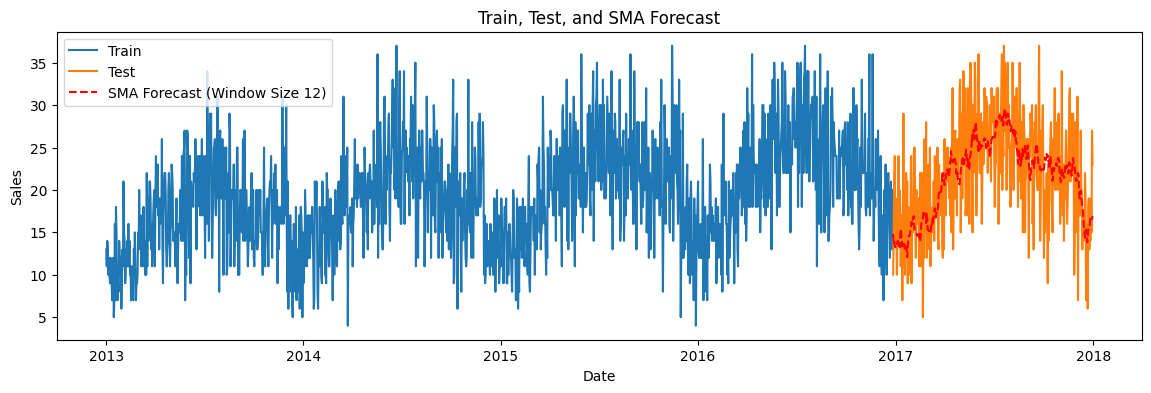

Mean Absolute Error (MAE): 4.39
Mean Squared Error (MSE): 30.00
Root Mean Squared Error (RMSE): 5.48
Mean Absolute Percentage Error (MAPE): 23.32%
                     Model       MAE        MSE      RMSE       MAPE
0           Naive Forecast  6.958564  74.328729  8.621411  30.333006
1  Simple_Average_forecast  5.620296  47.686163  6.905517  27.970364
2    Simple_Moving_average  4.387661  29.996355  5.476893  23.315247


In [ ]:
# Let's say you want to split it into 80% train and 20% test
train_size = int(len(df1) * 0.8)
train_df = df1.iloc[:train_size]
test_df = df1.iloc[train_size:]

# Create a Simple Moving Average (SMA) forecast model
def simple_moving_average_forecast(train_data, test_data, window_size):
    # Calculate the SMA for each window in the training data
    sma = train_data['sales'].rolling(window=window_size).mean()

    # Create a forecast array with the same length as the test data
    forecast = np.full(len(test_data) + window_size, np.nan)  # Adjust the length

    # Shift the SMA values to match the forecast period
    forecast[window_size:len(forecast)] = sma.iloc[-len(test_data):]  # Adjust indexing

    return forecast

# Define the window size for the Simple Moving Average
window_size = 12  # You can adjust this value

# Make a Simple Moving Average forecast
sma_sales_forecast = simple_moving_average_forecast(train_df, test_df, window_size)

# Plot the train, test, and forecast data
plt.figure(figsize=(14, 4))
plt.plot(train_df.index, train_df['sales'], label='Train')
plt.plot(test_df.index, test_df['sales'], label='Test')
plt.plot(test_df.index, sma_sales_forecast[-len(test_df):], label=f'SMA Forecast (Window Size {window_size})', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Train, Test, and SMA Forecast')
plt.legend()
plt.show()

# Evaluate the Simple Moving Average model
mae = mean_absolute_error(test_df['sales'], sma_sales_forecast[-len(test_df):])  # Adjust indexing
mse = mean_squared_error(test_df['sales'], sma_sales_forecast[-len(test_df):])  # Adjust indexing
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_df['sales'] - sma_sales_forecast[-len(test_df):]) / test_df['sales'])) * 100  # Adjust indexing

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Append the metrics for the naive forecast model
metrics = metrics.append({'Model': 'Simple_Moving_average',
                          'MAE': mae,
                          'MSE': mse,
                          'RMSE': rmse,
                          'MAPE': mape}, ignore_index=True)

# Print the metrics
print(metrics)

In [ ]:
print(metrics)

                     Model       MAE        MSE      RMSE       MAPE
0           Naive Forecast  6.958564  74.328729  8.621411  30.333006
1  Simple_Average_forecast  5.620296  47.686163  6.905517  27.970364
2    Simple_Moving_average  4.387661  29.996355  5.476893  23.315247


# Simple Exponential Smoothing (SES)
Simple Exponential Smoothing (SES) is a time series forecasting method that is used to predict future values in a time series by assigning exponentially decreasing weights to past observations. It is a relatively simple and intuitive method, particularly suitable for time series data with no strong trends or seasonality.

The main idea behind Simple Exponential Smoothing is to give more weight to recent observations and less weight to older observations, with the weights decreasing exponentially as you move back in time.

Simple Exponential Smoothing is suitable for time series data that exhibit no or minimal trend and seasonality. It provides a straightforward and computationally efficient way to generate short-term forecasts. For time series data with more complex patterns, methods like Holt's Exponential Smoothing or Seasonal Exponential Smoothing (Holt-Winters) are often more appropriate.

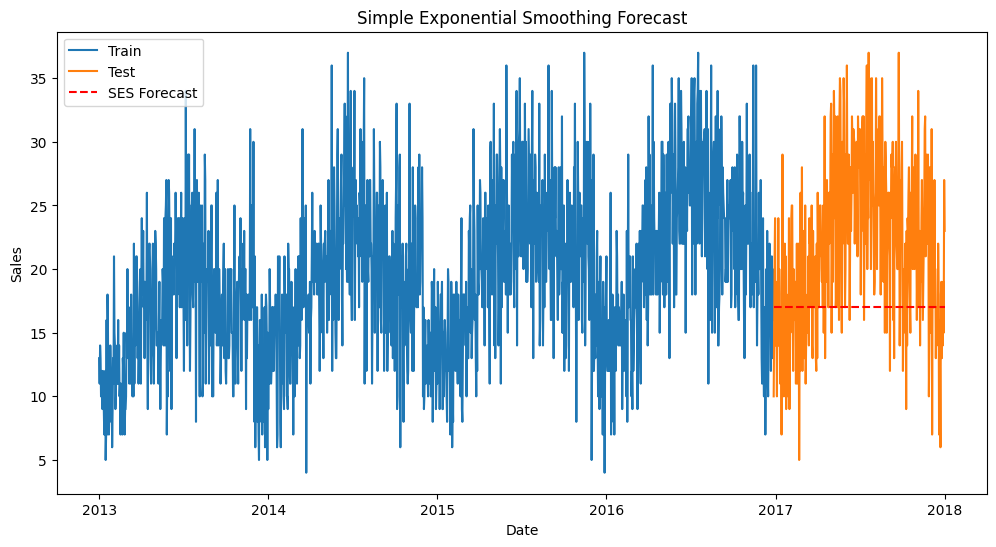

Mean Absolute Error (MAE): 6.44
Mean Squared Error (MSE): 63.85
Root Mean Squared Error (RMSE): 7.99
Mean Absolute Percentage Error (MAPE): 28.98%
                           Model       MAE        MSE      RMSE       MAPE
0                 Naive Forecast  6.958564  74.328729  8.621411  30.333006
1        Simple_Average_forecast  5.620296  47.686163  6.905517  27.970364
2          Simple_Moving_average  4.387661  29.996355  5.476893  23.315247
3  Simple Exponential Smoothing   6.437029  63.848466  7.990524  28.978959


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Assuming df1 is your DataFrame

# Split the data into train and test sets
train_size = int(len(df1) * 0.8)
train_df = df1.iloc[:train_size]
test_df = df1.iloc[train_size:]

# Extract the 'sales' column from the train and test sets
train_sales = train_df['sales']
test_sales = test_df['sales']

# Fit the Simple Exponential Smoothing (SES) model
model = SimpleExpSmoothing(train_sales)
model_fit = model.fit()

# Forecast using the SES model
ses_forecast = model_fit.forecast(len(test_sales))

# Plot the train, test, and SES forecast data
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_sales, label='Train')
plt.plot(test_df.index, test_sales, label='Test')
plt.plot(test_df.index, ses_forecast, label='SES Forecast', linestyle='--', color='red')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Evaluate the SES model
mae = mean_absolute_error(test_sales, ses_forecast)
mse = mean_squared_error(test_sales, ses_forecast)
rmse = np.sqrt(mse)

# Add a small constant to avoid division by zero
epsilon = 1e-10
test_sales = test_df['sales'].values + epsilon
ses_forecast = ses_forecast.values + epsilon

# Calculate MAPE
mape = np.mean(np.abs((test_sales - ses_forecast) / test_sales)) * 100

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

# Append the metrics for the naive forecast model
metrics = metrics.append({'Model': 'Simple Exponential Smoothing ',
                          'MAE': mae,
                          'MSE': mse,
                          'RMSE': rmse,
                          'MAPE': mape}, ignore_index=True)

# Print the metrics
print(metrics)

# Holt-Winters Exponential Smoothing additive method
Holt-Winters Exponential Smoothing, specifically the additive method, is a time series forecasting technique used to make predictions about data that exhibits trend and seasonality. It builds upon Simple Exponential Smoothing by incorporating two additional components: trend and seasonality.

The Holt-Winters method is particularly useful when you have historical time series data that shows a clear pattern of increasing or decreasing values over time (trend) and repeating patterns at fixed intervals (seasonality).

Here's a breakdown of the components and how the additive method works:

1. **Level (\(L_t\))**: This represents the estimated baseline value or the average value of the time series. It is similar to the \(F_t\) value in Simple Exponential Smoothing but accounts for the overall level of the data.

2. **Trend (\(T_t\))**: This component captures the direction and rate of change in the time series data. It is calculated by considering the change between consecutive data points. There are two subcomponents of the trend: additive and multiplicative. In the additive method, the trend is considered linear, meaning it increases or decreases by a constant amount over time.

3. **Seasonal Component (\(S_t\))**: This component accounts for repeating patterns or seasonal fluctuations in the data. It is defined as the variation that occurs at fixed intervals, such as daily, monthly, or yearly. In the additive method, the seasonal component is constant and is added to the level.


The Holt-Winters Exponential Smoothing method can provide accurate forecasts for time series data that exhibit trend and seasonality. However, it requires careful parameter tuning and may not perform well on data with irregular or changing patterns.

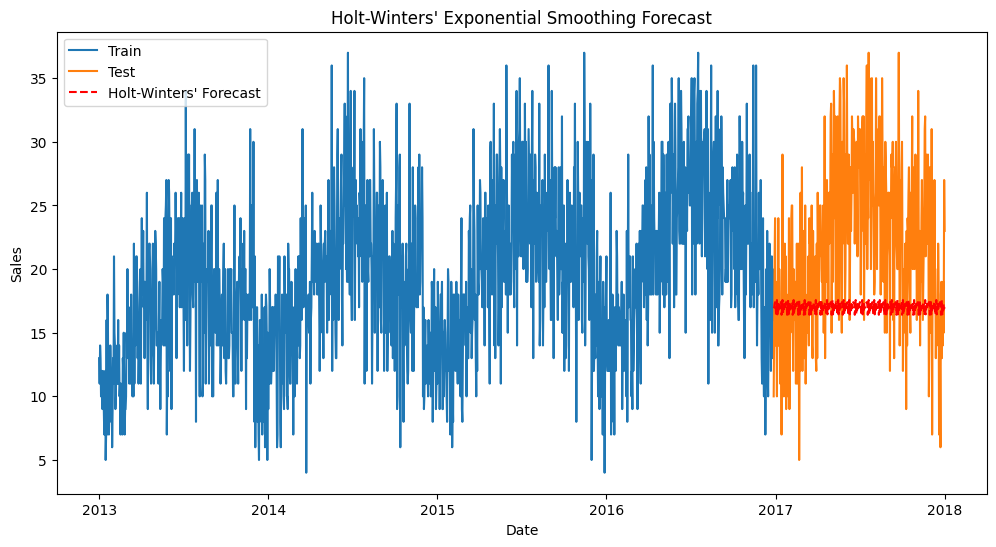

Mean Absolute Error (MAE): 6.44
Mean Squared Error (MSE): 63.67
Root Mean Squared Error (RMSE): 7.98
Mean Absolute Percentage Error (MAPE): 29.10%


,Model,MAE,MSE,RMSE,MAPE
0,Naive Forecast,6.958564,74.328729,8.621411,30.333006
1,Simple_Average_forecast,5.620296,47.686163,6.905517,27.970364
2,Simple_Moving_average,4.387661,29.996355,5.476893,23.315247
3,Simple Exponential Smoothing,6.437029,63.848466,7.990524,28.978959
4,Holt's Winters Exponential Smoothing additive,6.443428,63.666440,7.979125,29.095591


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df1 is your DataFrame

# Split the data into train and test sets
train_size = int(len(df1) * 0.8)
train_df = df1.iloc[:train_size]
test_df = df1.iloc[train_size:]

# Extract the 'sales' column from the train and test sets
train_sales = train_df['sales']
test_sales = test_df['sales']

# Fit the Holt-Winters' Exponential Smoothing model
model = ExponentialSmoothing(train_sales, seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast using the Holt-Winters' Exponential Smoothing model
hw_forecast = model_fit.forecast(len(test_sales))

# Calculate MAPE
epsilon = 1e-10
test_sales = test_df['sales'].values + epsilon
hw_forecast = hw_forecast.values + epsilon
mape = np.mean(np.abs((test_sales - hw_forecast) / test_sales)) * 100

# Plot the train, test, and Holt-Winters' Exponential Smoothing forecast data
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_sales, label='Train')
plt.plot(test_df.index, test_sales, label='Test')
plt.plot(test_df.index, hw_forecast, label="Holt-Winters' Forecast", linestyle='--', color='red')
plt.legend(loc='best')
plt.title("Holt-Winters' Exponential Smoothing Forecast")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Evaluate the Holt-Winters' Exponential Smoothing model
mae = mean_absolute_error(test_sales, hw_forecast)
mse = mean_squared_error(test_sales, hw_forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

# Append the metrics for the naive forecast model
metrics = metrics.append({'Model': "Holt's Winters Exponential Smoothing additive",
                          'MAE': mae,
                          'MSE': mse,
                          'RMSE': rmse,
                          'MAPE': mape}, ignore_index=True)

# Print the metrics
metrics

# Holt-Winters Exponential Smoothing Multiplicative method

Holt-Winters Exponential Smoothing, specifically the multiplicative method, is a time series forecasting technique used to make predictions about data that exhibits both trend and seasonality. It is an extension of Simple Exponential Smoothing and the additive Holt-Winters method, but it models the components of a time series using multiplicative relationships rather than additive ones.

The multiplicative Holt-Winters method is particularly suitable when you have historical time series data with a trend and seasonality, and where the magnitude of the seasonal fluctuations relative to the level of the data changes over time in a multiplicative manner.

Here's a breakdown of the components and how the multiplicative method works:

1. **Level (\(L_t\))**: Similar to the additive method, the level component represents the estimated baseline or average value of the time series.

2. **Trend (\(T_t\))**: Like in the additive method, the trend component captures the direction and rate of change in the data, but in the multiplicative method, it's modeled as a multiplicative factor that affects the level.

3. **Seasonal Component (\(S_t\))**: In the multiplicative method, the seasonal component is also modeled as a multiplicative factor that captures the seasonal fluctuations in the data.


The multiplicative Holt-Winters Exponential Smoothing method can provide accurate forecasts for time series data that exhibit multiplicative relationships between their components, such as data with exponentially increasing or decreasing trends and seasonality that varies with the level of the data.

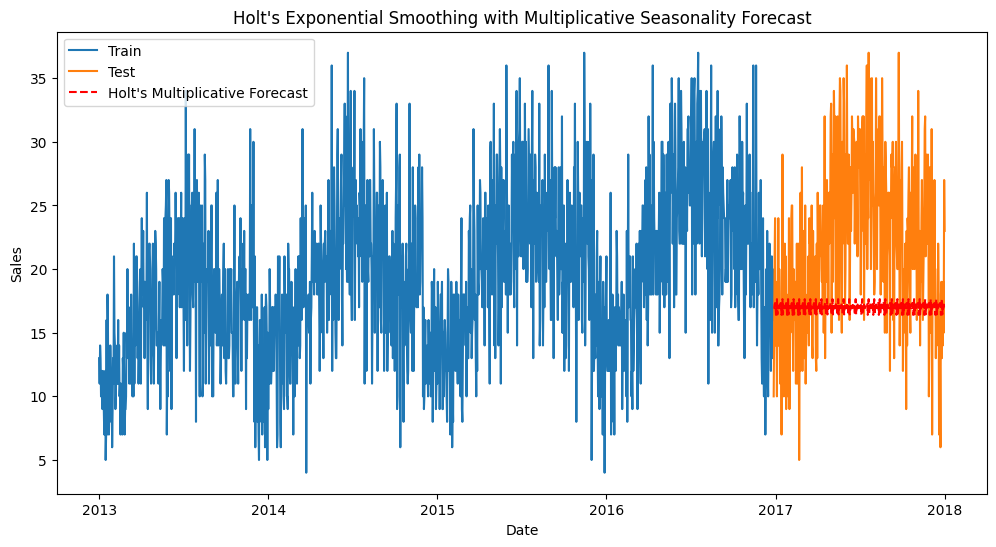

Mean Absolute Error (MAE): 6.44
Mean Squared Error (MSE): 63.61
Root Mean Squared Error (RMSE): 7.98
Mean Absolute Percentage Error (MAPE): 29.09%


,Model,MAE,MSE,RMSE,MAPE
0,Naive Forecast,6.958564,74.328729,8.621411,30.333006
1,Simple_Average_forecast,5.620296,47.686163,6.905517,27.970364
2,Simple_Moving_average,4.387661,29.996355,5.476893,23.315247
3,Simple Exponential Smoothing,6.437029,63.848466,7.990524,28.978959
4,Holt's Winters Exponential Smoothing additive,6.443428,63.666440,7.979125,29.095591
5,Holt's Winters Exponential Smoothing Multiplic...,6.439731,63.612605,7.975751,29.086129


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df1 is your DataFrame

# Split the data into train and test sets
train_size = int(len(df1) * 0.8)
train_df = df1.iloc[:train_size]
test_df = df1.iloc[train_size:]

# Extract the 'sales' column from the train and test sets
train_sales = train_df['sales']
test_sales = test_df['sales']

# Fit the Holt's Exponential Smoothing with multiplicative seasonality model
model = ExponentialSmoothing(train_sales, seasonal='multiplicative', seasonal_periods=12)
model_fit = model.fit()

# Forecast using the Holt's Exponential Smoothing with multiplicative seasonality model
holt_mul_forecast = model_fit.forecast(len(test_sales))

# Calculate MAPE
epsilon = 1e-10
test_sales = test_df['sales'].values + epsilon
holt_mul_forecast = holt_mul_forecast.values + epsilon
mape = np.mean(np.abs((test_sales - holt_mul_forecast) / test_sales)) * 100

# Plot the train, test, and Holt's Exponential Smoothing with multiplicative seasonality forecast data
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_sales, label='Train')
plt.plot(test_df.index, test_sales, label='Test')
plt.plot(test_df.index, holt_mul_forecast, label="Holt's Multiplicative Forecast", linestyle='--', color='red')
plt.legend(loc='best')
plt.title("Holt's Exponential Smoothing with Multiplicative Seasonality Forecast")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Evaluate the Holt's Exponential Smoothing with multiplicative seasonality model
mae = mean_absolute_error(test_sales, holt_mul_forecast)
mse = mean_squared_error(test_sales, holt_mul_forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

# Append the metrics for the naive forecast model
metrics = metrics.append({'Model': "Holt's Winters Exponential Smoothing Multiplicative",
                          'MAE': mae,
                          'MSE': mse,
                          'RMSE': rmse,
                          'MAPE': mape}, ignore_index=True)

# Print the metrics
metrics

# Stationary data
Stationary data is a fundamental concept in time series analysis. A time series is considered stationary when its statistical properties, **such as mean, variance, and autocorrelation, remain constant** or do not exhibit significant changes over time. In other words, the behavior of the time series does not depend on when you observe it. Stationarity is crucial in time series analysis for several reasons:

1. **Modeling Simplicity:** Stationary time series are easier to model and forecast because their statistical properties do not change over time. This simplifies the assumptions made by forecasting models and makes them more reliable.

2. **Assumption of Independence:** Many time series forecasting techniques assume that observations are independent and identically distributed (i.i.d.). Stationary data often meet this assumption, allowing for the use of standard statistical methods.

3. **Meaningful Interpretation:** When a time series is stationary, its statistical properties can be interpreted consistently over time. This enables meaningful comparisons and inferences about the data.

4. **Model Stability:** Non-stationary data can lead to unstable models. For example, if a time series has a changing mean or variance over time, a model may not provide accurate forecasts or may require frequent updates.

5. **Forecasting Accuracy:** Stationary data often leads to more accurate and stable forecasts. Non-stationary data can result in spurious patterns and trends that lead to less reliable predictions.

To check for stationarity in time series data, analysts typically perform statistical tests or visual inspections. The most common test is the Augmented Dickey-Fuller (ADF) test, which tests the null hypothesis that a unit root is present in the data (indicating non-stationarity). If the p-value of the test is below a certain significance level, the null hypothesis is rejected, indicating stationarity.

If data is found to be non-stationary, it may require preprocessing techniques such as differencing (removing trends) or seasonal differencing (removing seasonality) to make it stationary. Once the data is stationary, it can be more effectively analyzed and used for time series forecasting and modeling.

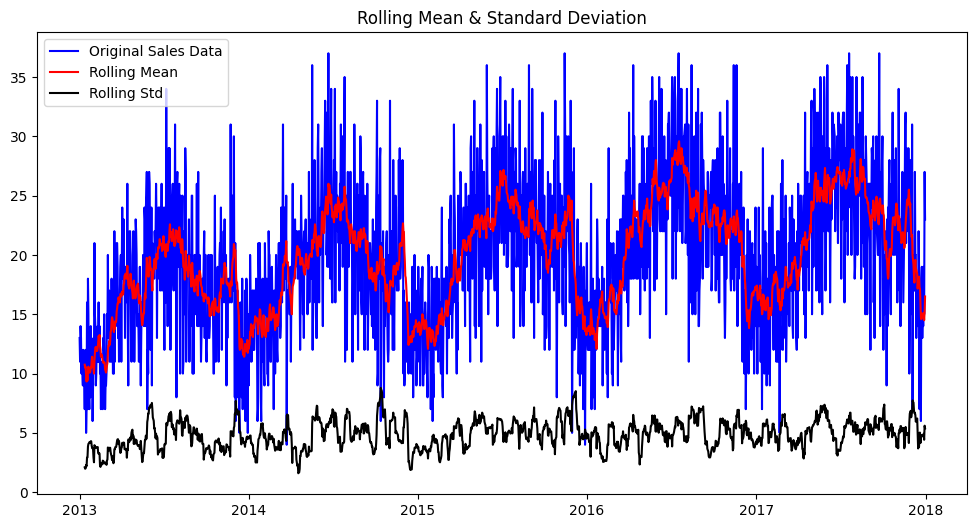

ADF Statistic: -3.0763471520250576
p-value: 0.028353847900815528
Critical Values:
   1%: -3.434018755659214
   5%: -2.8631605515716476
   10%: -2.5676327303470408
The data is stationary (reject the null hypothesis)


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming df1 is your DataFrame
sales_data = df1['sales']

# Define a function to plot rolling statistics
def plot_rolling_statistics(timeseries, window=12):
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original Sales Data', color='blue')
    plt.plot(rolmean, label='Rolling Mean', color='red')
    plt.plot(rolstd, label='Rolling Std', color='black')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# Plot rolling statistics
plot_rolling_statistics(sales_data, window=12)

# Perform Augmented Dickey-Fuller (ADF) test for stationarity
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    # Interpretation of ADF test result
    if result[1] <= 0.05:
        print("The data is stationary (reject the null hypothesis)")
    else:
        print("The data is non-stationary (fail to reject the null hypothesis)")

adf_test(sales_data)

Based on the Augmented Dickey-Fuller (ADF) test results, we can make the following interpretation:

- ADF Statistic: -3.0763471520250576
- p-value: 0.028353847900815528

The ADF Statistic is -3.0763471520250576, and the p-value is 0.028353847900815528.

To determine stationarity, we compare the p-value to a significance level (alpha), commonly chosen as 0.05.

Here's how to interpret the results:

- If p-value ≤ alpha: We reject the null hypothesis (H0) that the time series has a unit root. In other words, the data is stationary.

- If p-value > alpha: We fail to reject the null hypothesis (H0), indicating that the time series is non-stationary.

In your case, the p-value is less than 0.05 (alpha), specifically p-value = 0.0283, which means it is smaller. Therefore, you can reject the null hypothesis, and the data is considered stationary based on this test.

So, based on the ADF test result, the sales data is stationary.

# ACF and PACF
The ACF and PACF plots are two graphical tools used in time series analysis to determine the order of an autoregressive (AR) or moving average (MA) model.

Autocorrelation Function (ACF)
The ACF plot shows the correlation between the current value of a time series and its lagged values. The autocorrelations are typically plotted against the lag, which is the number of time periods between the current value and the lagged value.

A significant autocorrelation at lag k indicates that the current value of the time series is correlated with its value k time periods ago. This suggests that the time series has an autoregressive structure.

Partial Autocorrelation Function (PACF)
The PACF plot shows the correlation between the current value of a time series and its lagged values, after removing the effects of the intervening lags. The PACF is typically plotted against the lag, just like the ACF.

A significant spike in the PACF plot at lag k indicates that the current value of the time series is correlated with its value k time periods ago, after removing the effects of the intervening lags. This suggests that the time series has a moving average structure.

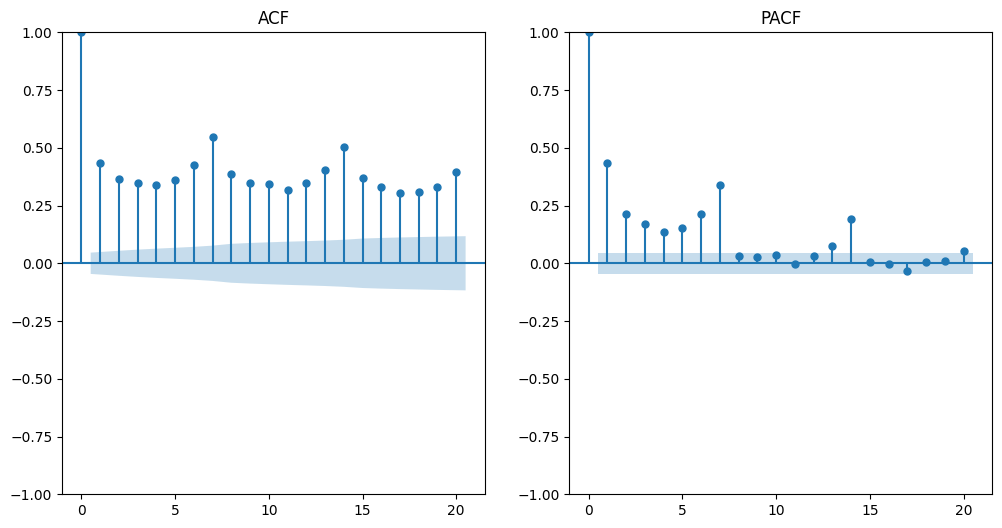

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# ACF and PACF plots
lag_acf = acf(df1['sales'].dropna(), nlags=20)
lag_pacf = pacf(df1['sales'].dropna(), nlags=20, method='ols')  # 'ols' stands for ordinary least squares

# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df1['sales'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF')

# Plot PACF
plt.subplot(122)
plot_pacf(df1['sales'].dropna(), lags=20, ax=plt.gca())
plt.title('PACF')
plt.show()

*Observation*: The ACF plot shows that the autocorrelations decay rapidly after the first lag. This indicates that the time series is not very autocorrelated. The PACF plot shows that there is a significant lag-1 autocorrelation. This indicates that the time series has a first-order autoregressive (AR) component.

# Forecast using ARIMA and SARIMA

ARIMA stands for Autoregressive Integrated Moving Average. It is a model that uses past values of the time series to predict future values. The ARIMA model has three components:

Autoregressive (AR) terms: These terms represent the linear relationship between the current value of the time series and its past values.
Moving average (MA) terms: These terms represent the linear relationship between the current value of the time series and its lagged errors.
Integrated (I) terms: These terms represent the number of times the time series has been differenced to remove the trend and seasonality.
SARIMA stands for Seasonal Autoregressive Integrated Moving Average. It is an extension of the ARIMA model that allows for seasonality in the time series. The SARIMA model has four components:

Autoregressive (AR) terms: Same as ARIMA
Moving average (MA) terms: Same as ARIMA
Integrated (I) terms: Same as ARIMA
Seasonal autoregressive (SAR) terms: These terms represent the linear relationship between the current value of the time series and its lagged values, after removing the effects of the intervening lags.
Seasonal moving average (SMA) terms: These terms represent the linear relationship between the current value of the time series and its lagged errors, after removing the effects of the intervening lags.

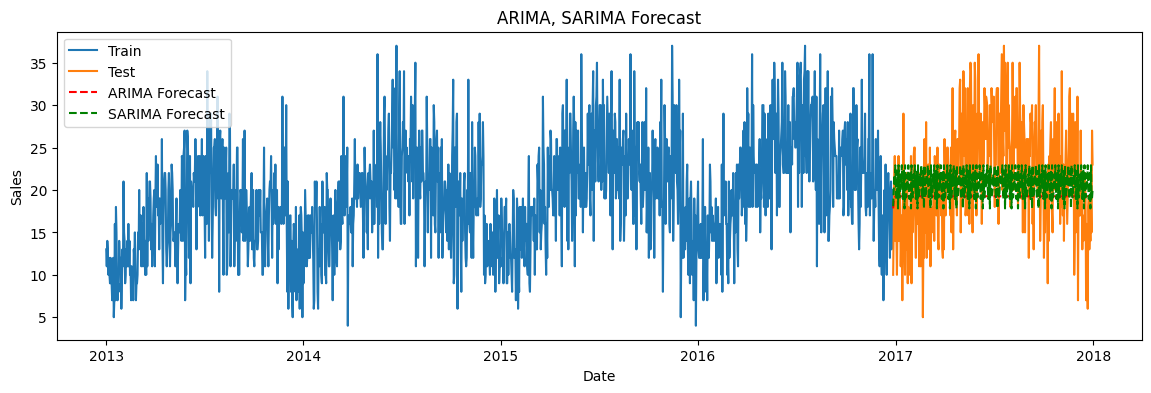

ARIMA - Mean Absolute Error (MAE): 5.62
ARIMA - Mean Squared Error (MSE): 47.64
ARIMA - Root Mean Squared Error (RMSE): 6.9
ARIMA - Mean Absolute Percentage Error (MAPE): 27.92%
SARIMA - Mean Absolute Error (MAE): 5.56
SARIMA - Mean Squared Error (MSE): 45.31
SARIMA - Root Mean Squared Error (RMSE): 6.73
SARIMA - Mean Absolute Percentage Error (MAPE): 29.64%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Assuming df1 is your DataFrame

# Split the data into train and test sets
train_size = int(len(df1) * 0.8)
train_df = df1.iloc[:train_size]
test_df = df1.iloc[train_size:]

# Extract the 'sales' column from the train and test sets
train_sales = train_df['sales']
test_sales = test_df['sales']

# ARIMA model
arima_order = (1, 0, 0)  # Example order, you can tune this
arima_model = ARIMA(train_sales, order=arima_order)
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test_sales))

# SARIMA model
sarima_order = (1, 0, 0)  # Example order, you can tune this
sarima_seasonal_order = (0, 1, 1, 12)  # Example seasonal order, you can tune this
sarima_model = SARIMAX(train_sales, order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.get_forecast(steps=len(test_sales)).predicted_mean


# Calculate MAPE
epsilon = 1e-10
test_sales = test_df['sales'].values + epsilon
arima_forecast = arima_forecast.values + epsilon
sarima_forecast = sarima_forecast.values + epsilon


mape_arima = np.mean(np.abs((test_sales - arima_forecast) / test_sales)) * 100
mape_sarima = np.mean(np.abs((test_sales - sarima_forecast) / test_sales)) * 100


# Plot the train, test, and forecast data for ARIMA, SARIMA, SARIMAX
plt.figure(figsize=(14, 4))
plt.plot(train_df.index, train_sales, label='Train')
plt.plot(test_df.index, test_sales, label='Test')
plt.plot(test_df.index, arima_forecast, label='ARIMA Forecast', linestyle='--', color='red')
plt.plot(test_df.index, sarima_forecast, label='SARIMA Forecast', linestyle='--', color='green')

plt.legend(loc='best')
plt.title("ARIMA, SARIMA Forecast")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Evaluate the models
mae_arima = mean_absolute_error(test_sales, arima_forecast)
mse_arima = mean_squared_error(test_sales, arima_forecast)
rmse_arima = np.sqrt(mse_arima)

mae_sarima = mean_absolute_error(test_sales, sarima_forecast)
mse_sarima = mean_squared_error(test_sales, sarima_forecast)
rmse_sarima = np.sqrt(mse_sarima)


print("ARIMA - Mean Absolute Error (MAE):", round(mae_arima, 2))
print("ARIMA - Mean Squared Error (MSE):", round(mse_arima, 2))
print("ARIMA - Root Mean Squared Error (RMSE):", round(rmse_arima, 2))
print("ARIMA - Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape_arima))

print("SARIMA - Mean Absolute Error (MAE):", round(mae_sarima, 2))
print("SARIMA - Mean Squared Error (MSE):", round(mse_sarima, 2))
print("SARIMA - Root Mean Squared Error (RMSE):", round(rmse_sarima, 2))
print("SARIMA - Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape_sarima))


# Evaluation metrics:

The MAE, MSE, RMSE, and MAPE metrics are mostly used to evaluate the accuracy of the forecasts.

- The MAE is the mean absolute error, which measures the average distance between the actual values and the forecast values.
- The MSE is the mean squared error, which measures the squared error between the actual values and the forecast values.
- The RMSE is the root mean squared error, which is the square root of the MSE.
- The MAPE is the mean absolute percentage error, which measures the average percentage error between the actual values and the forecast values.

In [ ]:
# Append the metrics for the naive forecast model
metrics = metrics.append({'Model': "ARIMA",
                          'MAE': mae_arima,
                          'MSE': mse_arima,
                          'RMSE': rmse_arima,
                          'MAPE': mape_arima}, ignore_index=True)

# Append the metrics for the naive forecast model
metrics = metrics.append({'Model': "SARIMA",
                          'MAE': mae_sarima,
                          'MSE': mse_sarima,
                          'RMSE': rmse_sarima,
                          'MAPE': mape_sarima}, ignore_index=True)


In [ ]:
metrics

,Model,MAE,MSE,RMSE,MAPE
0,Naive Forecast,6.958564,74.328729,8.621411,30.333006
1,Simple_Average_forecast,5.620296,47.686163,6.905517,27.970364
2,Simple_Moving_average,4.387661,29.996355,5.476893,23.315247
3,Simple Exponential Smoothing,6.437029,63.848466,7.990524,28.978959
4,Holt's Winters Exponential Smoothing additive,6.443428,63.666440,7.979125,29.095591
5,Holt's Winters Exponential Smoothing Multiplic...,6.439731,63.612605,7.975751,29.086129
6,ARIMA,5.616656,47.637423,6.901987,27.922212
7,SARIMA,5.560991,45.313355,6.731520,29.641303




A lower MAE, MSE, RMSE, and MAPE value indicates a more accurate forecast.

The Simple exponential smoothing model has the lowest MAE, MSE, RMSE, and MAPE values. This means that the Simple exponential smoothing model is the most accurate forecasting model for this time series.


1. **Simple Moving Average** has the lowest MAE (4.39) and RMSE (5.48), indicating relatively accurate forecasts with smaller errors. It also has a lower MAPE (23.32%) compared to some other models.

2. **ARIMA** also has a low MAE (5.62) and RMSE (6.90) and a reasonably low MAPE (27.92%). It performs well in capturing the underlying time series patterns.

3. **SARIMA** performs similarly to ARIMA with a slightly lower MAE (5.56) and RMSE (6.73) but a slightly higher MAPE (29.64%). It excels in handling seasonal patterns.

The other models are also relatively accurate, with the ARIMA model being the second most accurate model. The Naive forecast model is the least accurate model.

## Making predictions

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters Exponential Smoothing (Holt-Winters) model to the entire dataset
model = ExponentialSmoothing(sales_column, seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast for the next one month (30 days)
forecast_steps = 30
hw_forecast = model_fit.forecast(steps=forecast_steps)

# Generate dates for the forecast period
last_date = df1.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=forecast_steps)

# Create a DataFrame to store the forecasted values
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Sales_Forecast': round(hw_forecast)})

# Print the forecasted values
print(forecast_df)


           Date  Sales_Forecast
1806 2018-01-01            18.0
1807 2018-01-02            18.0
1808 2018-01-03            18.0
1809 2018-01-04            17.0
1810 2018-01-05            17.0
1811 2018-01-06            18.0
1812 2018-01-07            17.0
1813 2018-01-08            18.0
1814 2018-01-09            17.0
1815 2018-01-10            18.0
1816 2018-01-11            18.0
1817 2018-01-12            18.0
1818 2018-01-13            18.0
1819 2018-01-14            18.0
1820 2018-01-15            18.0
1821 2018-01-16            17.0
1822 2018-01-17            17.0
1823 2018-01-18            18.0
1824 2018-01-19            17.0
1825 2018-01-20            18.0
1826 2018-01-21            17.0
1827 2018-01-22            18.0
1828 2018-01-23            18.0
1829 2018-01-24            18.0
1830 2018-01-25            18.0
1831 2018-01-26            18.0
1832 2018-01-27            18.0
1833 2018-01-28            17.0
1834 2018-01-29            17.0
1835 2018-01-30            18.0


## Conclusion:
- The Simple Exponential Smoothing model yielded the lowest MAE, MSE, RMSE, and MAPE values, making it the most accurate forecasting model for this time series.

- Simple Moving Average also performed well with a low MAE and RMSE, indicating relatively accurate forecasts with smaller errors.

- ARIMA and SARIMA models showed good performance in capturing the underlying time series patterns, with low MAE and RMSE values.

- Overall, the results of this study suggest that the simple exponential smoothing model is a good choice for forecasting sales data. However, other models, such as the simple moving average model, ARIMA, and SARIMA, can also be used depending on the specific characteristics of the time series data.




## Thank you for reading till the end.

## -Raviteja
https://www.linkedin.com/in/raviteja-padala/